In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zero_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers


def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels,
                          epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zero_channels, train_labels,
                          epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7003 - loss: 1.0603 - val_accuracy: 0.8569 - val_loss: 0.4427
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9127 - loss: 0.2837 - val_accuracy: 0.9447 - val_loss: 0.1849
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9454 - loss: 0.1774 - val_accuracy: 0.9512 - val_loss: 0.1629
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9617 - loss: 0.1257 - val_accuracy: 0.9600 - val_loss: 0.1343
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9710 - loss: 0.0909 - val_accuracy: 0.9620 - val_loss: 0.1250
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9804 - loss: 0.0638 - val_accuracy: 0.9668 - val_loss: 0.1136
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9856 - loss: 0.0449 - val_accuracy: 0.9565 - val_loss: 0.1592
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.

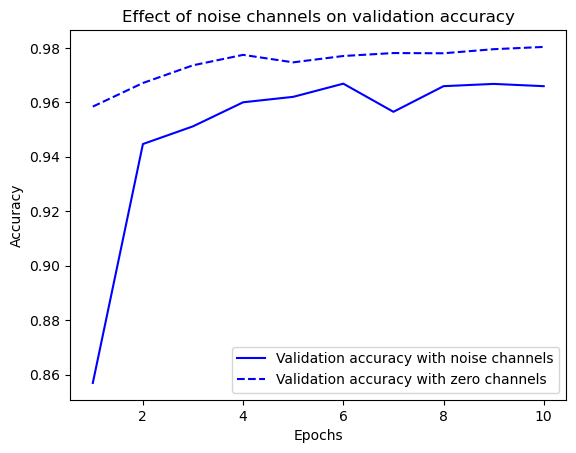

In [3]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zero channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1041 - loss: 2.3326 - val_accuracy: 0.1027 - val_loss: 2.3057
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1175 - loss: 2.2968 - val_accuracy: 0.1077 - val_loss: 2.3101
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1300 - loss: 2.2886 - val_accuracy: 0.1045 - val_loss: 2.3182
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1430 - loss: 2.2745 - val_accuracy: 0.1042 - val_loss: 2.3261
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1598 - loss: 2.2562 - val_accuracy: 0.0988 - val_loss: 2.3441
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1737 - loss: 2.2360 - val_accuracy: 0.0964 - val_loss: 2.3542
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1852 - loss: 2.2101 - val_accuracy: 0.1026 - val_loss: 2.3680
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1999 - loss: 2.1827 - val_accu

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8630 - loss: 0.4772 - val_accuracy: 0.9507 - val_loss: 0.1667
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1328 - val_accuracy: 0.9664 - val_loss: 0.1131
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0832 - val_accuracy: 0.9744 - val_loss: 0.0868
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0530 - val_accuracy: 0.9753 - val_loss: 0.0818
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0418 - val_accuracy: 0.9760 - val_loss: 0.0798
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0321 - val_accuracy: 0.9785 - val_loss: 0.0737
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0222 - val_accuracy: 0.9787 - val_loss: 0.0727
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9958 - loss: 0.0155 - val_accuracy: 0.

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8321 - loss: 0.9327 - val_accuracy: 0.9643 - val_loss: 0.1270
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1258 - val_accuracy: 0.9613 - val_loss: 0.1479
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0977 - val_accuracy: 0.9702 - val_loss: 0.1391
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0749 - val_accuracy: 0.9629 - val_loss: 0.1892
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9833 - loss: 0.0614 - val_accuracy: 0.9692 - val_loss: 0.1760
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0609 - val_accuracy: 0.9684 - val_loss: 0.2311
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0566 - val_accuracy: 0.9710 - val_loss: 0.2169
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0447 - val_accuracy: 0.

In [7]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7349 - loss: 1.0410 - val_accuracy: 0.9037 - val_loss: 0.3604
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8991 - loss: 0.3700 - val_accuracy: 0.9166 - val_loss: 0.3091
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9147 - loss: 0.3129 - val_accuracy: 0.9192 - val_loss: 0.2932
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9172 - loss: 0.3004 - val_accuracy: 0.9211 - val_loss: 0.2838
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9198 - loss: 0.2853 - val_accuracy: 0.9224 - val_loss: 0.2807
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9204 - loss: 0.2892 - val_accuracy: 0.9241 - val_loss: 0.2744
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9217 - loss: 0.2844 - val_accuracy: 0.9245 - val_loss: 0.2720
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9232 - loss: 0.2707 - 

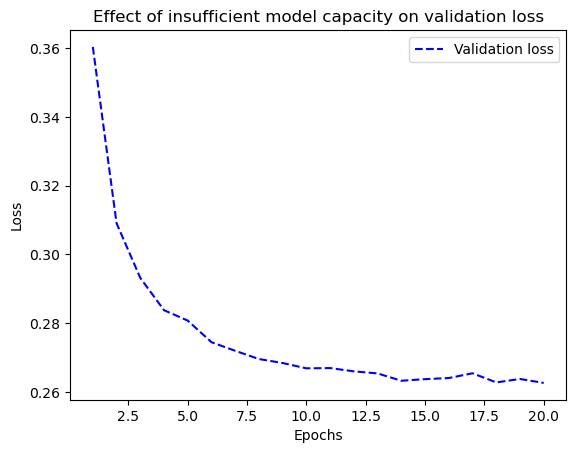

In [8]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8314 - loss: 0.6178 - val_accuracy: 0.9470 - val_loss: 0.1896
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9469 - loss: 0.1770 - val_accuracy: 0.9586 - val_loss: 0.1399
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9644 - loss: 0.1190 - val_accuracy: 0.9614 - val_loss: 0.1337
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9714 - loss: 0.0922 - val_accuracy: 0.9662 - val_loss: 0.1145
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.0698 - val_accuracy: 0.9699 - val_loss: 0.1019
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9821 - loss: 0.0573 - val_accuracy: 0.9734 - val_loss: 0.0965
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.9691 - val_loss: 0.1002
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.

In [10]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7045 - loss: 0.6099 - val_accuracy: 0.8476 - val_loss: 0.4243
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8863 - loss: 0.3628 - val_accuracy: 0.8761 - val_loss: 0.3289
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9173 - loss: 0.2578 - val_accuracy: 0.8791 - val_loss: 0.3053
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9330 - loss: 0.2057 - val_accuracy: 0.8840 - val_loss: 0.2879
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9490 - loss: 0.1630 - val_accuracy: 0.8896 - val_loss: 0.2749
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9579 - loss: 0.1399 - val_accuracy: 0.8844 - val_loss: 0.2912
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9614 - loss: 0.1190 - val_accuracy: 0.8851 - val_loss: 0.2913
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.1060 - val_accuracy: 0.8834 - val_loss

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6172 - loss: 0.6807 - val_accuracy: 0.8167 - val_loss: 0.6345
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8180 - loss: 0.6124 - val_accuracy: 0.8562 - val_loss: 0.5622
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8721 - loss: 0.5334 - val_accuracy: 0.8699 - val_loss: 0.4941
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8905 - loss: 0.4607 - val_accuracy: 0.8733 - val_loss: 0.4347
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9022 - loss: 0.3969 - val_accuracy: 0.8791 - val_loss: 0.3870
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9109 - loss: 0.3411 - val_accuracy: 0.8805 - val_loss: 0.3571
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9175 - loss: 0.2992 - val_accuracy: 0.8843 - val_loss: 0.3251
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9219 - loss: 0.2705 - val_accuracy: 0.8874 - val_loss

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6334 - loss: 0.6531 - val_accuracy: 0.8593 - val_loss: 0.3566
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8607 - loss: 0.3421 - val_accuracy: 0.7972 - val_loss: 0.4791
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8830 - loss: 0.2783 - val_accuracy: 0.8466 - val_loss: 0.3610
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9296 - loss: 0.1835 - val_accuracy: 0.8875 - val_loss: 0.2799
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9372 - loss: 0.1602 - val_accuracy: 0.8824 - val_loss: 0.3195
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9631 - loss: 0.1059 - val_accuracy: 0.8565 - val_loss: 0.3756
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9758 - loss: 0.0773 - val_accuracy: 0.8840 - val_loss: 0.3500
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9815 - loss: 0.0663 - val_accuracy: 0.8848 - v

In [13]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7005 - loss: 0.6717 - val_accuracy: 0.8542 - val_loss: 0.4672
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8947 - loss: 0.4056 - val_accuracy: 0.8725 - val_loss: 0.4035
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9195 - loss: 0.3254 - val_accuracy: 0.8817 - val_loss: 0.3741
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9299 - loss: 0.2827 - val_accuracy: 0.8898 - val_loss: 0.3552
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9467 - loss: 0.2528 - val_accuracy: 0.8811 - val_loss: 0.3722
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9489 - loss: 0.2435 - val_accuracy: 0.8867 - val_loss: 0.3625
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9487 - loss: 0.2365 - val_accuracy: 0.8849 - val_loss: 0.3671
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9552 - loss: 0.2246 - val_accuracy: 0.8826 - val_loss

In [14]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5553 - loss: 0.6750 - val_accuracy: 0.8345 - val_loss: 0.5451
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7260 - loss: 0.5564 - val_accuracy: 0.8664 - val_loss: 0.4227
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7899 - loss: 0.4699 - val_accuracy: 0.8780 - val_loss: 0.3428
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8293 - loss: 0.4011 - val_accuracy: 0.8798 - val_loss: 0.3166
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8563 - loss: 0.3486 - val_accuracy: 0.8868 - val_loss: 0.2861
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8871 - loss: 0.3011 - val_accuracy: 0.8917 - val_loss: 0.2750
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8994 - loss: 0.2728 - val_accuracy: 0.8857 - val_loss: 0.2846
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9096 - loss: 0.2408 - val_accuracy: 0.8907 - val_loss